In [65]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
%matplotlib inline


In [66]:
#import mnist dataset from tensorflow.keras.datasets.mnist
mnist = tf.keras.datasets.mnist

In [67]:
#load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

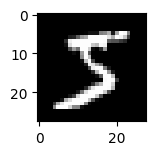

5


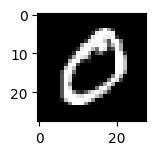

0


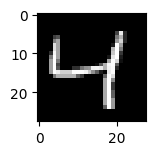

4


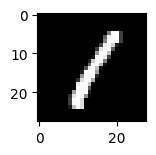

1


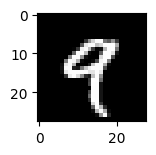

9


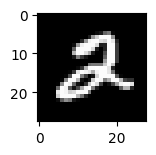

2


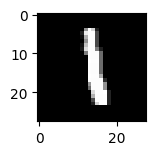

1


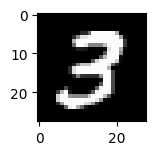

3


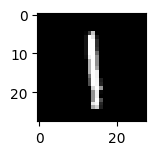

1


In [68]:
#show random examples of the dataset and their labels
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.show()
    print(y_train[i])

In [69]:
#check the shape of the dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


To check if a dataset needs normalization, 

you can examine the range of values in the dataset. If the values span a wide range, it is likely that normalization is needed. You can use the np.max() and np.min() functions to find the maximum and minimum values in the dataset, respectively. If the difference between the maximum and minimum values is large, normalization may be necessary.

In [70]:
#check if the dataset needs normalization

print(np.max(x_train))
print(np.min(x_train))


255
0


Normalization is a common preprocessing step in machine learning tasks. 

It is used to scale the features of a dataset to a standard range, typically between 0 and 1 or -1 and 1. Normalization helps to ensure that all features have equal importance and prevents any single feature from dominating the learning process.

In the context of the given Jupyter Notebook, the normalization of the dataset is being discussed to determine if it is necessary. The range of values in the dataset is examined using the `np.max()` and `np.min()` functions to find the maximum and minimum values, respectively. If the difference between the maximum and minimum values is large, normalization may be necessary.

By normalizing the dataset, the model can learn more effectively and make better predictions. It can also help to improve the convergence of optimization algorithms and prevent numerical instability.

Summary: Normalization is a preprocessing step used to scale the features of a dataset to a standard range. It ensures equal importance of features and prevents any single feature from dominating the learning process.


To decide if value differences are large and need normalization, you can calculate the range of values in the dataset and compare it to the scale of the problem you are trying to solve. Here's a general approach:

1. Calculate the range of values in the dataset by finding the maximum and minimum values. For example, you can use the `np.max()` and `np.min()` functions in Python.

2. Compare the range of values to the scale of the problem. Consider the following factors:
   - Magnitude: If the range of values is significantly larger or smaller than the expected range for the problem, normalization may be needed. For example, if the range of values is in the thousands but the problem only requires values between 0 and 1, normalization can help.
   - Variability: If the range of values varies widely across different features or samples, normalization can help ensure that all features contribute equally to the learning process.
   - Algorithm sensitivity: Some machine learning algorithms are sensitive to the scale of input features. For example, algorithms like k-nearest neighbors and support vector machines can be affected by differences in feature scales. In such cases, normalization can improve algorithm performance.

3. Consider the specific requirements of the machine learning algorithm you plan to use. Some algorithms, such as neural networks, can benefit from normalization as it helps with convergence and prevents numerical instability.

By considering these factors, you can determine if the value differences are large and if normalization is necessary for your specific problem and dataset.


In [71]:
#normalize the dataset

x_train = x_train / 255.0
x_test = x_test / 255.0

print(np.max(x_train))
print(np.min(x_train))


1.0
0.0


In [72]:
#check if the labels are categorical or not (10 labels)

print(np.unique(y_train))


[0 1 2 3 4 5 6 7 8 9]


In [73]:
#build CNN model using keras Sequential API and add layers to it (Conv2D, MaxPooling2D, Flatten, Dense) and compile the model

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [92]:
#train the model
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 0.0446 - val_accuracy: 0.9913
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0043 - accuracy: 0.9986 - val_loss: 0.0521 - val_accuracy: 0.9906
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.0510 - val_accuracy: 0.9917
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 0.0609 - val_accuracy: 0.9897
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0653 - val_accuracy: 0.9905
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0684 - val_accuracy: 0.9893
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0029 - accuracy: 0.9990 - val_loss: 0.0605 - val_accura

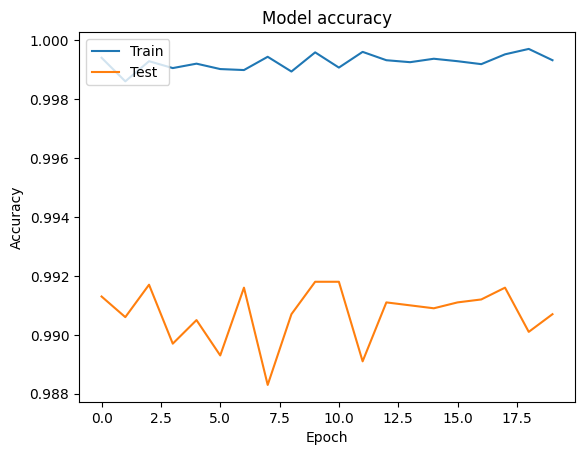

In [93]:
#visualize the model training and validation data on a matplotlib graph

plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [94]:
#evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0838 - accuracy: 0.9907
0.9907000064849854


313/313 [==============================] - 0s 1ms/step
[5.6004675e-24 1.1071728e-24 5.1958077e-26 2.1889290e-16 1.8112511e-21
 2.0035083e-24 1.7840283e-35 1.0000000e+00 7.7717466e-23 2.0583705e-18]
7


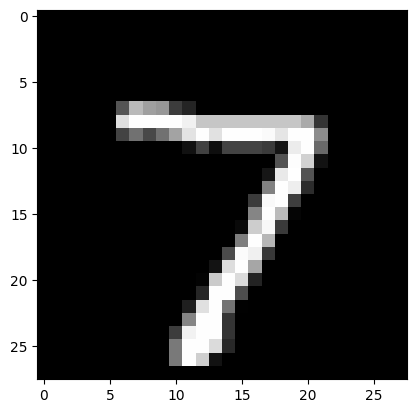

7


In [97]:
#predict the model and graph the prediction

predictions = model.predict(x_test)
print(predictions[0])
print(np.argmax(predictions[0]))
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.show()
print(y_test[0])



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2024.1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.1-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 1.1 MB/s eta 0:00:0000:0100:01m
Using cached pytz-2024.1-py2.py3-none-any.whl (505 kB)
Using cached tzdata-2024.1-py2.py3-none-any.whl (345 kB)
313/313 [==============================] - 1s 2ms/step


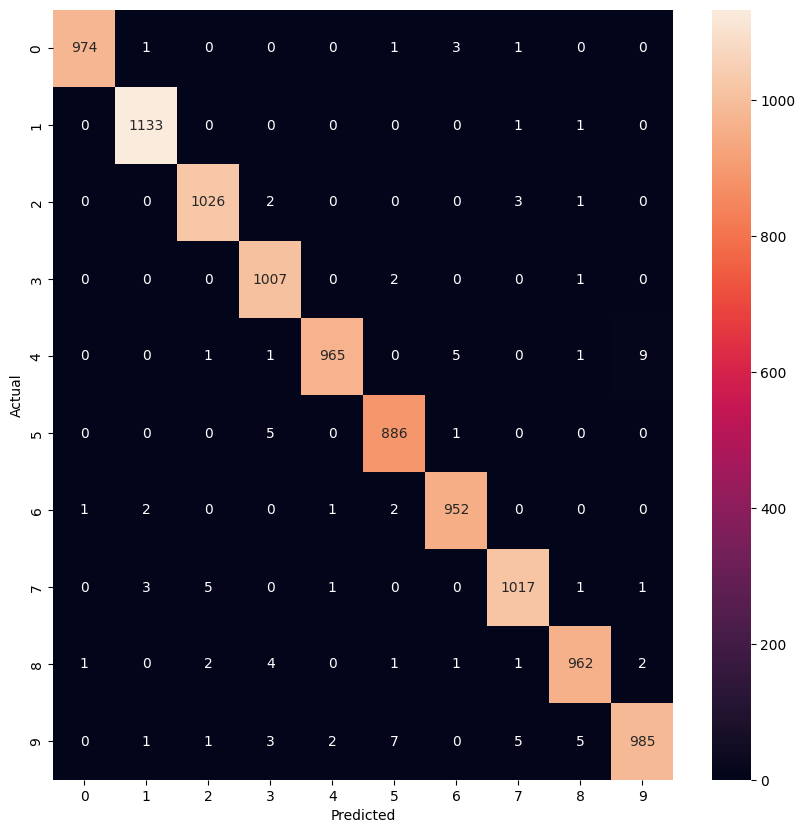

In [99]:
#confusion matrix
from sklearn.metrics import confusion_matrix
!pip install seaborn
import seaborn as sns

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [100]:
#classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [102]:
#save the model
model.save('mnist_model.keras')


In [104]:
#make model predictions on new data and show the results on a matplotlib graph with the prediction and the actual label
#make small gui for uploading photos and showing the prediction

from tkinter import *
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
!pip install opencv-python
import cv2

def open_image():
    global panelA, panelB
    path = filedialog.askopenfilename()
    if len(path) > 0:
        image = cv2.imread(path)
        image = cv2.resize(image, (28, 28))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.expand_dims(image, axis=0)
        image = np.expand_dims(image, axis=3)
        image = image / 255.0
        pred = model.predict(image)
        pred = np.argmax(pred)
        image = Image.open(path)
        image = ImageTk.PhotoImage(image)
        if panelA is None or panelB is None:
            panelA = Label(image=image)
            panelA.image = image
            panelA.pack(side="left", padx=10, pady=10)
            panelB = Label(text=f"Prediction: {pred}")
            panelB.pack(side="right", padx=10, pady=10)
        else:
            panelA.configure(image=image)
            panelB.configure(text=f"Prediction: {pred}")
            panelA.image = image

root = Tk()
panelA = None
panelB = None

btn = Button(root, text="Upload Image", command=open_image)
btn.pack(side="bottom", fill="both", expand="yes", padx="10", pady="10")
root.mainloop()



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 1.3 MB/s eta 0:00:0000:0100:010m
1/1 [==============================] - 0s 10ms/step
